In [1]:
import np
import pandas as pd
from scipy.io import loadmat
import pandas as pd

In [2]:
import pandas as pd

at = pd.read_excel("../resources/Video_List.ods")

In [3]:
at

,Video_Number,VideoID,FileName,Experiment_Type,Category,Source_Dataset,Source_Movie,Video_Duration
0,1,10,'10.avi',Short_Videos,HVLA,DECAF,August Rush,01:30:00
1,2,13,'13.avi',Short_Videos,HVLA,DECAF,Love Actually,00:51:00
2,3,138,'138.avi',Short_Videos,LVLA,MAHNOB-HCI,The Thin Red Line,01:56:00
3,4,18,'18.avi',Short_Videos,HVLA,DECAF,House of Flying Daggers,01:17:00
4,5,19,'19.wmv',Short_Videos,LVLA,DECAF,The Exorcist,02:00:00
5,6,20,'20.avi',Short_Videos,LVLA,DECAF,My Girl,01:00:00
6,7,23,'23.wmv',Short_Videos,LVLA,DECAF,My Bodyguard,01:46:00
7,8,30,'30.avi',Short_Videos,LVHA,MAHNOB-HCI,Silent Hill,01:10:00
8,9,31,'31.wmv',Short_Videos,LVHA,DECAF,Prestige,02:30:00
9,10,34,'34.avi',Short_Videos,LVHA,DECAF,Pink Flamingos,01:00:00


In [4]:
# **Notebook in cui abbozzo le cose e vedo di farle andare **
# Al momento non mi fa il rendering di testo Markdown quindi commento in celle.

In [5]:
"""
## AMIGOS

A data file (pre-processed) is relative to a specific participant from the name ex. [Data_Preprocessed_P01] -> Participant 1

> The videos are in the order of Video_Number (See Video_List), so not in the order of presentation.
This means the first video is the same for each participant. The following table shows the channel layout and the preprocessing performed:

Each matrix is a video.

Root level:
    dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])

YY: are the trials

joined_data  {1,YY}: Contiene gli esperimenti (Che sono una quantità definita: )
    samples: XX x 17 (XX numero di samples per le 17 dimensioni processate).

labels_ext_anotation {1,YY}: ZZ x 3 channels (segment_index, valence and arousal)


| Channel      | Region           | Typically Associated With                      |
| ------------ | ---------------- | ---------------------------------------------- |
| **AF3, AF4** | Prefrontal       | Decision-making, attention, emotion regulation |
| **F3, F4**   | Frontal          | Working memory, emotion, motor planning        |
| **F7, F8**   | Frontal-Temporal | Language, emotion, social cognition            |
| **FC5, FC6** | Fronto-central   | Motor control, sensorimotor rhythm (SMR)       |
| **T7, T8**   | Temporal         | Auditory processing, language comprehension    |
| **P7, P8**   | Parietal         | Spatial orientation, sensorimotor integration  |
| **O1, O2**   | Occipital        | Visual processing                              |


| Index | Channel | Region         | Typically Associated With                              |
|-------|---------|----------------|---------------------------------------------------------|
| 1     | AF3     | Prefrontal     | Decision-making, attention, emotion regulation          |
| 2     | F7      | Frontal-Temporal| Language, emotion, social cognition                     |
| 3     | F3      | Frontal        | Working memory, emotion, motor planning                 |
| 4     | FC5     | Fronto-central | Motor control, sensorimotor rhythm (SMR)                |
| 5     | T7      | Temporal       | Auditory processing, language comprehension             |
| 6     | P7      | Parietal       | Spatial orientation, sensorimotor integration           |
| 7     | O1      | Occipital      | Visual processing                                       |
| 8     | O2      | Occipital      | Visual processing                                       |
| 9     | P8      | Parietal       | Spatial orientation, sensorimotor integration           |
| 10    | T8      | Temporal       | Auditory processing, language comprehension             |
| 11    | FC6     | Fronto-central | Motor control, sensorimotor rhythm (SMR)                |
| 12    | F4      | Frontal        | Working memory, emotion, motor planning                 |
| 13    | F8      | Frontal-Temporal| Language, emotion, social cognition                     |
| 14    | AF4     | Prefrontal     | Decision-making, attention, emotion regulation          |
"""

"\n## AMIGOS\n\nA data file (pre-processed) is relative to a specific participant from the name ex. [Data_Preprocessed_P01] -> Participant 1\n\n> The videos are in the order of Video_Number (See Video_List), so not in the order of presentation.\nThis means the first video is the same for each participant. The following table shows the channel layout and the preprocessing performed:\n\nEach matrix is a video.\n\nRoot level:\n    dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])\n\nYY: are the trials\n\njoined_data  {1,YY}: Contiene gli esperimenti (Che sono una quantità definita: )\n    samples: XX x 17 (XX numero di samples per le 17 dimensioni processate).\n\nlabels_ext_anotation {1,YY}: ZZ x 3 channels (segment_index, valence and arousal)\n\n\n| Channel      | Region           | Typically Associated With                      |\n| ------------ | ---------------- | ---------------------------------------

In [6]:
frequency = 128  # As stated by dataset after pre-processing 128Hz

In [7]:
mat = loadmat("../resources/Data_Preprocessed_P01.mat")

In [8]:
from pprint import pprint

# Mapping to video ID
# When Harry met Sally is id=5. So position 12 in list of videos.
pd.DataFrame(mat['VideoIDs'][0])

,0
0,[10]
1,[13]
2,[138]
3,[18]
4,[19]
5,[20]
6,[23]
7,[30]
8,[31]
9,[34]


In [9]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])

In [10]:
mat['joined_data'].shape  # 1 x YY (The 20 videos data)

(1, 20)

In [11]:
# First dimension is kinda lost (No use for it actually)s
video = 12

video_data = mat['joined_data'][0][video]
video_data.shape  # (Sampling points x channels)

(14347, 17)

In [12]:
print(f"Video n.{video} lasts {video_data.shape[0] / 128} seconds")

Video n.12 lasts 112.0859375 seconds


With frequency 128  we have that our series lasts:  112.0859375


<module 'matplotlib.pyplot' from '/home/jacopo/PycharmProjects/progetto-tesi/.venv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

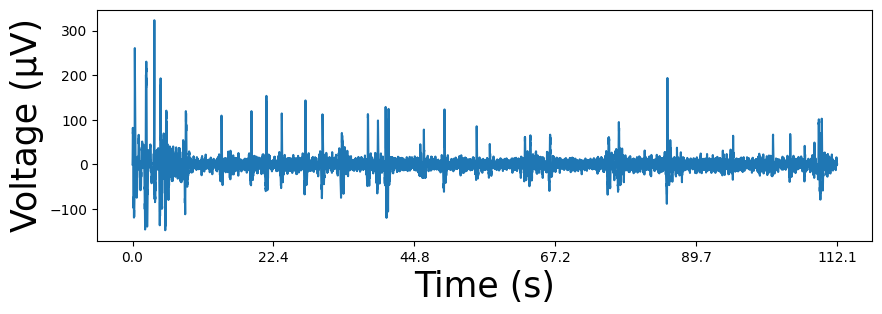

In [13]:
from eeg.plotting import plot_time_series

# Channel AF3
eeg = video_data.T  # Shape becomes (17, 12225)
plot_time_series(eeg[0], ticks=5, frequency=128)

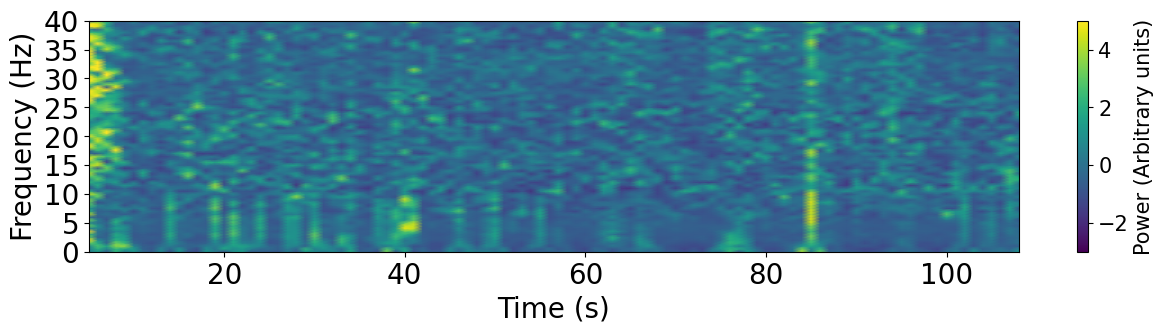

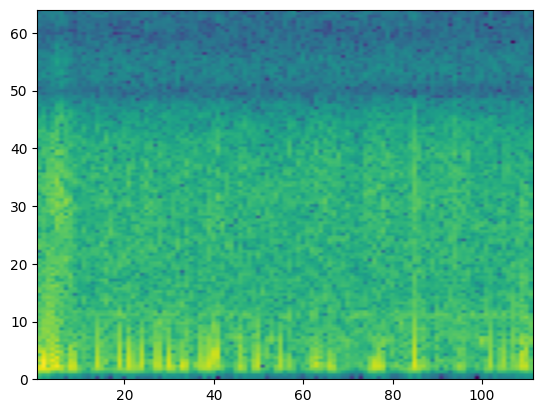

In [43]:
from stft import compute_stft, plot, normalize_stft_zscore
from matplotlib import pyplot as plt
import numpy as np

frequency = 128
# 40 Hz covers delta, theta, alpha, beta bands (most classic EEG rhythms).
f, t, linear = compute_stft(eeg[0], frequency, clip_frequency=40)
# f, t, linear = normalize_stft_zscore(f, t, linear) # Non sono convinto di questo

plot(f, t, linear).show()
p_xx, fq, bins, im = plt.specgram(eeg[0], Fs=frequency, mode="magnitude")

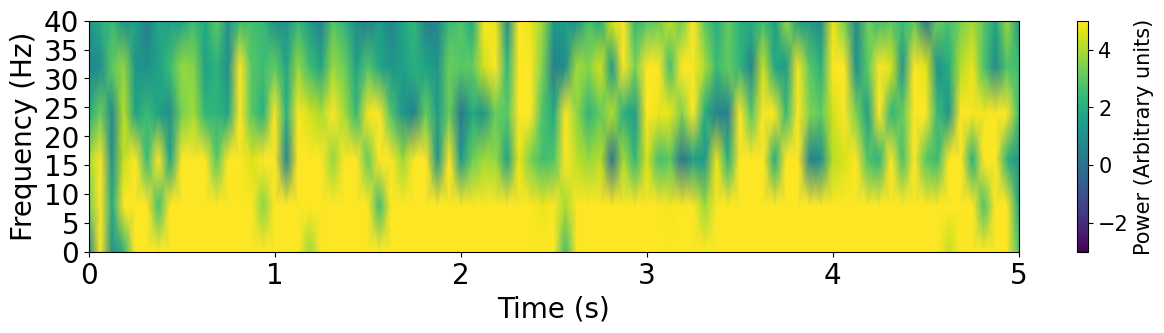

In [22]:
import numpy as np

wav = np.load("../resources/example_wav_1.npy")
f, t, linear = compute_stft(wav, 2048, clip_frequency=40)
plot(f, t, linear).show()

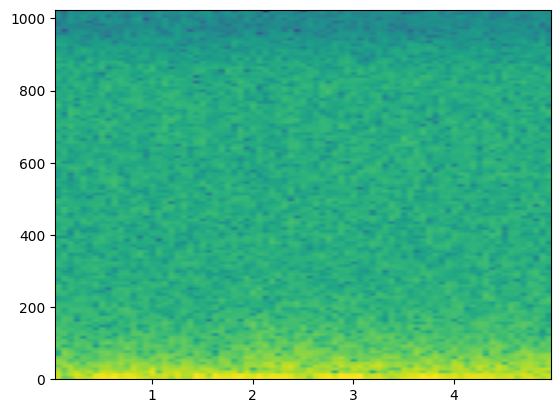

In [36]:
from matplotlib import pyplot as plt

p = plt.specgram(wav, Fs=2048)